In [11]:
import pandas as pd

In [12]:
df=pd.read_excel(r"D:\httpsupliance\Assignment.xlsx", sheet_name=None)
df


{'UserDetails.csv':   User ID      User Name  Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
 5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
 6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
 7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
 8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
 9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner 

In [13]:
df1=df["UserDetails.csv"]
df2=df["CookingSessions.csv"]
df3=df["OrderDetails.csv"]

In [14]:
df1.head(2)

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8


In [15]:
df2.head(2)

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0


In [16]:
df3.head(2)

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002


#### Missing values check

In [17]:
df1.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [18]:
df2.isnull().sum()

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

In [19]:
df3.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

####  Data Cleaning Summary:
 #####  Missing Values:
###### OrderDetails: 2 missing values in the Rating column.

#### Fill the missing values with Mean or Median

In [20]:
df3['Rating'].fillna(df3['Rating'].mean(), inplace=True)
df3.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64

## Duplicate rows check

In [21]:
df1.duplicated().sum()

0

In [22]:
df2.duplicated().sum()

0

In [23]:
df3.duplicated().sum()

0

##### Duplicates:
###### No duplicate rows were found in any dataset.
###### if we find duplicates rows in our datasets we drop the duplicates rows by using df.drop_duplicates()

## Steps to Merge Datasets:
      Merge UserDetails with CookingSessions:

      Use User ID as the key to join both datasets.
      Merge the result with OrderDetails:

      Use both User ID and Session ID to merge the combined dataset from step 1 with OrderDetails.

In [24]:
# Step 1: Merge UserDetails with CookingSessions on 'User ID'
merged_step1 = pd.merge(df1, df2, on="User ID", how="inner")

# Step 2: Merge the result with OrderDetails on 'User ID' and 'Session ID'
final_merged_data = pd.merge(merged_step1, df3, on=["User ID", "Session ID"], how="inner")




In [25]:
final_merged_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


In [26]:
final_merged_data.shape

(16, 24)

In [27]:
final_merged_data.describe()

,Age,Registration Date,Total Orders,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Amount (USD),Rating
count,16.000000,16,16.000000,16,16,16.000000,16.000000,16.000000,16,16.000000,16.000000
mean,32.687500,2023-03-31 16:30:00,10.562500,2024-12-05 02:50:37.500000,2024-12-05 03:20:56.249999872,30.312500,4.518750,1008.500000,2024-12-04 12:00:00,11.250000,4.285714
min,25.000000,2023-01-15 00:00:00,5.000000,2024-12-01 12:00:00,2024-12-01 12:20:00,10.000000,4.000000,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,28.000000,2023-02-20 00:00:00,8.000000,2024-12-03 08:37:30,2024-12-03 08:58:45,20.000000,4.300000,1004.750000,2024-12-02 18:00:00,9.000000,4.000000
50%,30.500000,2023-03-10 00:00:00,10.000000,2024-12-05 00:30:00,2024-12-05 00:57:30,30.000000,4.550000,1008.500000,2024-12-04 12:00:00,11.500000,4.000000
75%,35.750000,2023-05-22 00:00:00,12.500000,2024-12-06 23:22:30,2024-12-07 00:00:00,40.000000,4.725000,1012.250000,2024-12-06 06:00:00,13.125000,4.464286
max,42.000000,2023-08-11 00:00:00,15.000000,2024-12-08 19:30:00,2024-12-08 20:10:00,45.000000,5.000000,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,5.839164,NaN,3.119161,NaN,NaN,10.873324,0.292617,4.760952,NaN,2.435843,0.436436


### 1. Relationship Between Cooking Sessions and Orders
Objective: Understand if participating in cooking sessions impacts user orders.

In [28]:
# Total orders and sessions per user
session_order_analysis = final_merged_data.groupby('User ID').agg(
    total_sessions=('Session ID', 'nunique'),
    total_orders=('Order ID', 'nunique')
).reset_index()

# Correlation between session ratings and order ratings
correlation_analysis = final_merged_data[['Session Rating', 'Rating']].corr()

print(session_order_analysis)
print(correlation_analysis)


  User ID  total_sessions  total_orders
0    U001               3             3
1    U002               3             3
2    U003               3             3
3    U004               2             2
4    U005               2             2
5    U006               1             1
6    U007               1             1
7    U008               1             1
                Session Rating   Rating
Session Rating         1.00000  0.61151
Rating                 0.61151  1.00000


### 2. Demographics and User Behavior
Objective: Investigate how user demographics influence cooking and ordering behavior.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

# Popular dishes

In [30]:
final_merged_data["Dish Name_y"].value_counts()

Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64

In [31]:
value=final_merged_data["Dish Name_y"].value_counts().values
value

array([4, 4, 3, 2, 2, 1], dtype=int64)

In [32]:
index=final_merged_data["Dish Name_y"].value_counts().index
index

Index(['Spaghetti', 'Grilled Chicken', 'Caesar Salad', 'Pancakes',
       'Veggie Burger', 'Oatmeal'],
      dtype='object', name='Dish Name_y')

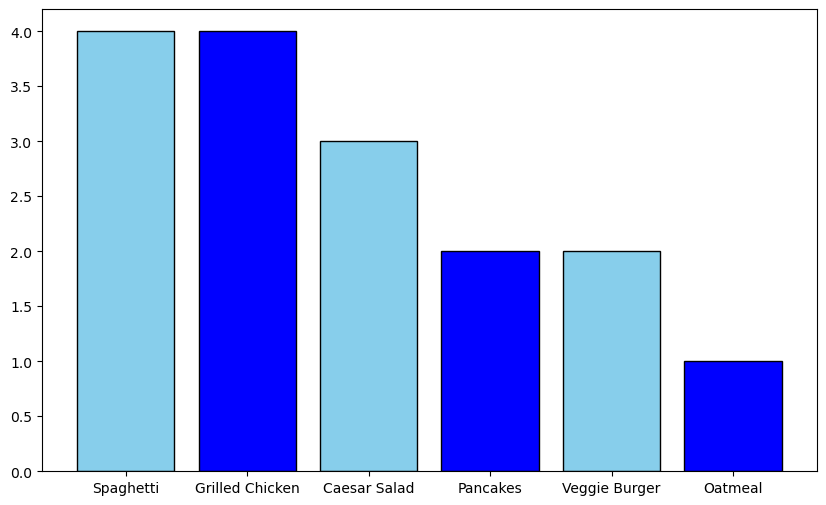

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(index,value,edgecolor='k',color=['skyblue','blue'], align='center')
plt.show()

### Find the list of the customer on the based on number of orders.

In [34]:
count=final_merged_data.groupby(by=['User Name']).count()
count['User ID']

User Name
Alice Johnson    3
Bob Smith        3
Charlie Lee      3
David Brown      2
Emma White       2
Frank Green      1
Grace King       1
Henry Lee        1
Name: User ID, dtype: int64

In [ ]:
counts=final_merged_data.groupby(by=['User Name','Dish Name_y']).count()
counts['User ID']

In [37]:
table=final_merged_data.pivot_table(index='Dish Name_y',values='Amount (USD)',aggfunc='sum')
table

,Amount (USD)
Dish Name_y,
Caesar Salad,28.0
Grilled Chicken,51.0
Oatmeal,7.0
Pancakes,16.5
Spaghetti,55.5
Veggie Burger,22.0


In [ ]:
tables=final_merged_data.pivot_table(index=['Meal Type_y','Dish Name_y'],values='Amount (USD)',aggfunc='sum')
tables

In [ ]:
final_merged_data['Day Name']=final_merged_data['Order Date'].dt.day_name()

In [ ]:
sb.countplot(x=final_merged_data['Day Name'])
plt.show()

In [50]:
final_merged_data.head(2)

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0


In [49]:
tableA=final_merged_data.pivot_table(index=['Location','Dish Name_y'],values='Order ID',aggfunc='count')
tableA

Order ID
Location      Dish Name_y              
Austin        Grilled Chicken         1
Boston        Spaghetti               1
Chicago       Grilled Chicken         1
              Pancakes                1
              Veggie Burger           1
Los Angeles   Caesar Salad            1
              Oatmeal                 1
              Spaghetti               1
Miami         Veggie Burger           1
New York      Grilled Chicken         1
              Pancakes                1
              Spaghetti               1
San Francisco Caesar Salad            1
              Spaghetti               1
Seattle       Caesar Salad            1
              Grilled Chicken         1

In [51]:
final_merged_data['Month']=final_merged_data['Registration Date'].dt.month_name()

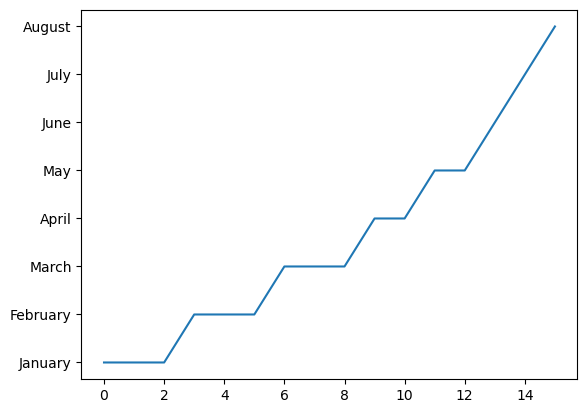

In [56]:
plt.plot(final_merged_data['Month'],)
plt.show()

In [ ]:
Line chart shows that our business grow day by day.

### Scatter chart between Dish and Rating

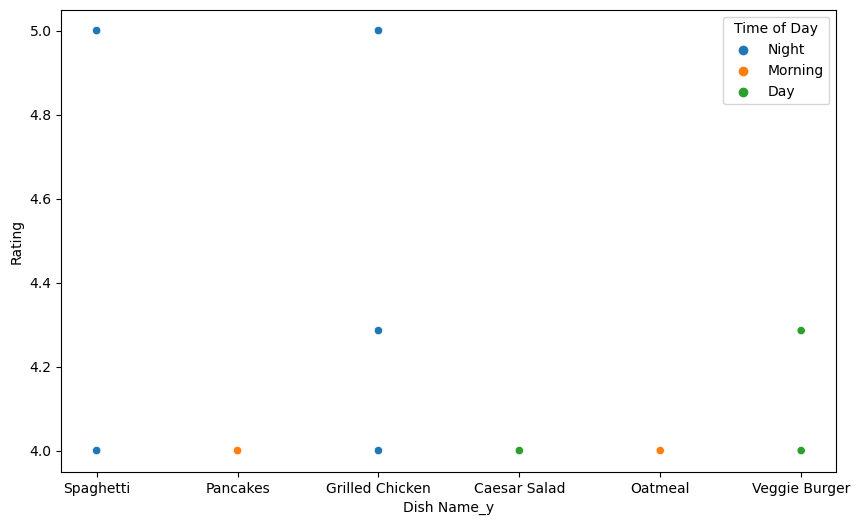

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10, 6))

sb.scatterplot(x=final_merged_data['Dish Name_y'], y=final_merged_data['Rating'], c ="blue",hue=final_merged_data['Time of Day'])
plt.show()
